In [437]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv("indian_liver_patient.csv",sep=",")
print(df.tail())

     Age Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
578   60   Male              0.5               0.1                   500   
579   40   Male              0.6               0.1                    98   
580   52   Male              0.8               0.2                   245   
581   31   Male              1.3               0.5                   184   
582   38   Male              1.0               0.3                   216   

     Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
578                        20                          34             5.9   
579                        35                          31             6.0   
580                        48                          49             6.4   
581                        29                          32             6.8   
582                        21                          24             7.3   

     Albumin  Albumin_and_Globulin_Ratio  Dataset  
578      1.6                

In [438]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB
None


In [439]:
print(df.isnull().sum()) 

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64


In [440]:
m=df["Albumin_and_Globulin_Ratio"].isin(["NaN"]) 
df[m]

Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
209   45  Female              0.9               0.3                   189   
241   51    Male              0.8               0.2                   230   
253   35  Female              0.6               0.2                   180   
312   27    Male              1.3               0.6                   106   

     Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
209                        23                          33             6.6   
241                        24                          46             6.5   
253                        12                          15             5.2   
312                        25                          54             8.5   

     Albumin  Albumin_and_Globulin_Ratio  Dataset  
209      3.9                         NaN        1  
241      3.1                         NaN        1  
253      2.7                         NaN        2  
312      4.8                         NaN        2

In [441]:
df["Albumin_and_Globulin_Ratio"]=df["Albumin_and_Globulin_Ratio"].interpolate()
print(df.loc[209,:])

Age                               45
Gender                        Female
Total_Bilirubin                  0.9
Direct_Bilirubin                 0.3
Alkaline_Phosphotase             189
Alamine_Aminotransferase          23
Aspartate_Aminotransferase        33
Total_Protiens                   6.6
Albumin                          3.9
Albumin_and_Globulin_Ratio      1.04
Dataset                            1
Name: 209, dtype: object


In [442]:
print(df.isnull().sum()) 

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64


In [443]:
print(df.Gender.unique())  

['Female' 'Male']


In [444]:
df=pd.get_dummies(df,columns=["Gender"])
print(df.head())

   Age  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0   65              0.7               0.1                   187   
1   62             10.9               5.5                   699   
2   62              7.3               4.1                   490   
3   58              1.0               0.4                   182   
4   72              3.9               2.0                   195   

   Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                        16                          18             6.8   
1                        64                         100             7.5   
2                        60                          68             7.0   
3                        14                          20             6.8   
4                        27                          59             7.3   

   Albumin  Albumin_and_Globulin_Ratio  Dataset  Gender_Female  Gender_Male  
0      3.3                        0.90        1              1      

In [445]:
print(df.dtypes) 

Age                             int64
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alamine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
Dataset                         int64
Gender_Female                   uint8
Gender_Male                     uint8
dtype: object


In [446]:
donusum = {"Gender_Female": int, 
           "Gender_Male": int
           } 
df=df.astype(donusum)
print(df.dtypes)

Age                             int64
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alamine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
Dataset                         int64
Gender_Female                   int32
Gender_Male                     int32
dtype: object


In [447]:
print(df[df.duplicated()])

     Age  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
19    40              0.9               0.3                   293   
26    34              4.1               2.0                   289   
34    38              2.6               1.2                   410   
55    42              8.9               4.5                   272   
62    58              1.0               0.5                   158   
106   36              5.3               2.3                   145   
108   36              0.8               0.2                   158   
138   18              0.8               0.2                   282   
143   30              1.6               0.4                   332   
158   72              0.7               0.1                   196   
164   39              1.9               0.9                   180   
174   31              0.6               0.1                   175   
201   49              0.6               0.1                   218   

     Alamine_Aminotransferase  As

In [448]:
df.drop_duplicates(inplace=True) 
df.reset_index(inplace=True,drop=True)

In [449]:
print(df.loc[18,:]) 
print(df.loc[19,:])

Age                            40.0
Total_Bilirubin                 0.9
Direct_Bilirubin                0.3
Alkaline_Phosphotase          293.0
Alamine_Aminotransferase      232.0
Aspartate_Aminotransferase    245.0
Total_Protiens                  6.8
Albumin                         3.1
Albumin_and_Globulin_Ratio      0.8
Dataset                         1.0
Gender_Female                   1.0
Gender_Male                     0.0
Name: 18, dtype: float64
Age                            51.00
Total_Bilirubin                 2.20
Direct_Bilirubin                1.00
Alkaline_Phosphotase          610.00
Alamine_Aminotransferase       17.00
Aspartate_Aminotransferase     28.00
Total_Protiens                  7.30
Albumin                         2.60
Albumin_and_Globulin_Ratio      0.55
Dataset                         1.00
Gender_Female                   0.00
Gender_Male                     1.00
Name: 19, dtype: float64


In [450]:
print(df.describe())

              Age  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
count  570.000000       570.000000        570.000000            570.000000   
mean    44.849123         3.321754          1.497544            291.750877   
std     16.242182         6.267941          2.833231            245.291859   
min      4.000000         0.400000          0.100000             63.000000   
25%     33.000000         0.800000          0.200000            176.000000   
50%     45.000000         1.000000          0.300000            208.000000   
75%     58.000000         2.600000          1.300000            298.000000   
max     90.000000        75.000000         19.700000           2110.000000   

       Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
count                570.000000                  570.000000      570.000000   
mean                  79.728070                  109.380702        6.496316   
std                  181.471697                  290.880671 

In [451]:
q_low  = df["Total_Bilirubin"].quantile(0.01)
print(q_low)
print(df[df["Total_Bilirubin"]<q_low])
print(np.where(df.Total_Bilirubin<q_low)) 

q_hi  = df["Total_Bilirubin"].quantile(0.99)
print(q_hi)
print(df[df["Total_Bilirubin"]>q_hi])
print(np.where(df.Total_Bilirubin>q_hi)) 

0.569
     Age  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
99    63              0.5               0.1                   170   
389   42              0.5               0.1                   162   
412   58              0.4               0.1                   100   
422   17              0.5               0.1                   206   
467    7              0.5               0.1                   352   
565   60              0.5               0.1                   500   

     Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
99                         21                          28             5.5   
389                       155                         108             8.1   
412                        59                         126             4.3   
422                        28                          21             7.1   
467                        28                          51             7.9   
565                        20                   

In [452]:
df.loc[ (99, 389, 412, 422, 467, 565),"Total_Bilirubin"]=0.5
df.loc[ (155, 246, 491, 492, 518, 546),"Total_Bilirubin"]=30.5

In [453]:
q_low  = df["Direct_Bilirubin"].quantile(0.01)
print(q_low)
print(df[df["Direct_Bilirubin"]<q_low])
print(np.where(df.Direct_Bilirubin<q_low)) 

q_hi  = df["Direct_Bilirubin"].quantile(0.99)
print(q_hi)
print(df[df["Direct_Bilirubin"]>q_hi])
print(np.where(df.Direct_Bilirubin>q_hi)) 

0.1
Empty DataFrame
Columns: [Age, Total_Bilirubin, Direct_Bilirubin, Alkaline_Phosphotase, Alamine_Aminotransferase, Aspartate_Aminotransferase, Total_Protiens, Albumin, Albumin_and_Globulin_Ratio, Dataset, Gender_Female, Gender_Male]
Index: []
(array([], dtype=int64),)
13.07899999999995
     Age  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
246   42             30.5              14.2                   285   
491   32             30.5              17.1                   218   
492   32             30.5              14.1                   219   
518   40             30.5              18.3                   285   
546   26             30.5              19.7                   390   
562   32             25.0              13.7                   560   

     Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
246                        65                         130             5.2   
491                        39                          79             5.

In [454]:
df.loc[ (246, 491, 492, 518, 546, 562),"Direct_Bilirubin"]=13.7

In [455]:
q_low  = df["Alkaline_Phosphotase"].quantile(0.01)
print(q_low)
print(df[df["Alkaline_Phosphotase"]<q_low])
print(np.where(df.Alkaline_Phosphotase<q_low)) 

q_hi  = df["Alkaline_Phosphotase"].quantile(0.99)
print(q_hi)
print(df[df["Alkaline_Phosphotase"]>q_hi])
print(np.where(df.Alkaline_Phosphotase>q_hi)) 

97.69
     Age  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
76    29              1.0               0.3                    75   
307   30              0.7               0.2                    63   
388   50              7.3               3.7                    92   
454   28              1.0               0.3                    90   
469   45              1.1               0.4                    92   
525   52              1.8               0.8                    97   

     Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
76                         25                          26             5.1   
307                        31                          27             5.8   
388                        44                         236             6.8   
454                        18                         108             6.8   
469                        91                         188             7.2   
525                        85                   

In [456]:
df.loc[ (76, 307, 388, 454, 469, 525),"Alkaline_Phosphotase"]=97
df.loc[ (72, 108, 109, 121, 220, 416),"Alkaline_Phosphotase"]=1580

In [457]:
q_low  = df["Alamine_Aminotransferase"].quantile(0.01)
print(q_low)
print(df[df["Alamine_Aminotransferase"]<q_low])
print(np.where(df.Alamine_Aminotransferase<q_low)) 

q_hi  = df["Alamine_Aminotransferase"].quantile(0.99)
print(q_hi)
print(df[df["Alamine_Aminotransferase"]>q_hi])
print(np.where(df.Alamine_Aminotransferase>q_hi)) 

11.690000000000001
     Age  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
103   24              0.7               0.2                   188   
270   18              1.3               0.7                   316   
314   24              3.3               1.6                   174   
370   60              1.4               0.7                   159   
415   52              0.6               0.1                   194   
418   47              0.8               0.2                   236   

     Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
103                        11                          10             5.5   
270                        10                          21             6.0   
314                        11                          33             7.6   
370                        10                          12             4.9   
415                        10                          12             6.9   
418                        10      

In [458]:
df.loc[ (25,44,110,111),"Alamine_Aminotransferase"]=1250

In [459]:
q_low  = df["Aspartate_Aminotransferase"].quantile(0.01)
print(q_low)
print(df[df["Aspartate_Aminotransferase"]<q_low])
print(np.where(df.Aspartate_Aminotransferase<q_low)) 

q_hi  = df["Aspartate_Aminotransferase"].quantile(0.99)
print(q_hi)
print(df[df["Aspartate_Aminotransferase"]>q_hi])
print(np.where(df.Aspartate_Aminotransferase>q_hi)) 

12.0
     Age  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
7     29              0.9               0.3                   202   
103   24              0.7               0.2                   188   
333   46              0.6               0.2                   115   

     Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
7                          14                          11             6.7   
103                        11                          10             5.5   
333                        14                          11             6.9   

     Albumin  Albumin_and_Globulin_Ratio  Dataset  Gender_Female  Gender_Male  
7        3.6                        1.10        1              1            0  
103      2.3                        0.71        2              1            0  
333      3.4                        0.90        1              0            1  
(array([  7, 103, 333], dtype=int64),)
987.8999999999951
     Age  Total_Bilirubin  Direc

In [460]:
df.loc[ (110, 111, 112, 128, 187, 194),"Aspartate_Aminotransferase"]=1050

In [461]:
q_low  = df["Total_Protiens"].quantile(0.01)
print(q_low)
print(df[df["Total_Protiens"]<q_low])
print(np.where(df.Total_Protiens<q_low)) 

q_hi  = df["Total_Protiens"].quantile(0.99)
print(q_hi)
print(df[df["Total_Protiens"]>q_hi])
print(np.where(df.Total_Protiens>q_hi))

3.6690000000000005
     Age  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
168   75              2.8               1.3                   250   
169   75              2.9               1.3                   218   
256   26              0.6               0.1                   110   
402   70              1.3               0.3                   690   
445   26              6.8               3.2                   140   
520   46              1.4               0.4                   298   

     Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
168                        23                          29             2.7   
169                        33                          37             3.0   
256                        15                          20             2.8   
402                        93                          40             3.6   
445                        37                          19             3.6   
520                       509      

In [462]:
df.loc[ (168, 169, 256, 402, 445, 520),"Total_Protiens"]=3.6
df.loc[ (257, 260, 322, 359, 497, 506),"Total_Protiens"]=8.7

In [463]:
q_low  = df["Albumin"].quantile(0.01)
print(q_low)
print(df[df["Albumin"]<q_low])
print(np.where(df.Albumin<q_low)) 

q_hi  = df["Albumin"].quantile(0.99)
print(q_hi)
print(df[df["Albumin"]>q_hi])
print(np.where(df.Albumin>q_hi))

1.469
     Age  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
168   75              2.8               1.3                   250   
170   65              1.9               0.8                   170   
425   65              0.8               0.2                   162   
445   26              6.8               3.2                   140   
451   45              0.7               0.2                   164   
520   46              1.4               0.4                   298   

     Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
168                        23                          29             3.6   
170                        36                          43             3.8   
425                        30                          90             3.8   
445                        37                          19             3.6   
451                        21                          53             4.5   
520                       509                   

In [464]:
df.loc[ (168, 170, 425, 445, 451, 520),"Albumin"]=1.4
df.loc[ (230, 331, 359),"Albumin"]=5.0

In [465]:
q_low  = df["Albumin_and_Globulin_Ratio"].quantile(0.01)
print(q_low)
print(df[df["Albumin_and_Globulin_Ratio"]<q_low])
print(np.where(df.Albumin_and_Globulin_Ratio<q_low)) 

q_hi  = df["Albumin_and_Globulin_Ratio"].quantile(0.99)
print(q_hi)
print(df[df["Albumin_and_Globulin_Ratio"]>q_hi])
print(np.where(df.Albumin_and_Globulin_Ratio>q_hi))

0.38380000000000003
     Age  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
388   50              7.3               3.7                    97   
445   26              6.8               3.2                   140   
446   65              1.1               0.5                   686   
506   35             26.3              12.1                   108   
520   46              1.4               0.4                   298   
565   60              0.5               0.1                   500   

     Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
388                        44                         236             6.8   
445                        37                          19             3.6   
446                        16                          46             5.7   
506                       168                         630             8.7   
520                       509                         623             3.6   
565                        20     

In [466]:
df.loc[ (388, 445, 446, 506, 520, 565),"Albumin_and_Globulin_Ratio"]=0.37
df.loc[ (23, 202, 478, 535, 559, 562),"Albumin_and_Globulin_Ratio"]=1.85

In [467]:
from scipy import stats
z=np.abs(stats.zscore(df["Total_Bilirubin"]))
z1=np.abs(stats.zscore(df["Direct_Bilirubin"]))
z2=np.abs(stats.zscore(df["Alkaline_Phosphotase"]))
z3=np.abs(stats.zscore(df["Alamine_Aminotransferase"]))
z4=np.abs(stats.zscore(df["Aspartate_Aminotransferase"]))
z5=np.abs(stats.zscore(df["Albumin"]))
z6=np.abs(stats.zscore(df["Albumin_and_Globulin_Ratio"]))

print(np.where(z>5))
print(np.where(z1>5))
print(np.where(z2>5))
print(np.where(z3>5))
print(np.where(z4>5))
print(np.where(z5>5))
print(np.where(z6>5))

(array([], dtype=int64),)
(array([], dtype=int64),)
(array([ 72, 108, 109, 121, 220, 416, 434], dtype=int64),)
(array([ 24,  25,  44, 110, 111, 112, 128, 194], dtype=int64),)
(array([ 44,  92, 110, 111, 112, 128, 187, 194], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)


In [468]:
from scipy import stats
z=np.abs(stats.zscore(df["Total_Bilirubin"]))
z1=np.abs(stats.zscore(df["Direct_Bilirubin"]))
z2=np.abs(stats.zscore(df["Alkaline_Phosphotase"]))
z3=np.abs(stats.zscore(df["Alamine_Aminotransferase"]))
z4=np.abs(stats.zscore(df["Aspartate_Aminotransferase"]))
z5=np.abs(stats.zscore(df["Albumin"]))
z6=np.abs(stats.zscore(df["Albumin_and_Globulin_Ratio"]))

print(np.where(z>5))
print(np.where(z1>5))
print(np.where(z2>5))
print(np.where(z3>5))
print(np.where(z4>5))
print(np.where(z5>5))
print(np.where(z6>5))
print(np.where(z6>5))

(array([], dtype=int64),)
(array([], dtype=int64),)
(array([ 72, 108, 109, 121, 220, 416, 434], dtype=int64),)
(array([ 24,  25,  44, 110, 111, 112, 128, 194], dtype=int64),)
(array([ 44,  92, 110, 111, 112, 128, 187, 194], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)


In [469]:
q_low  = df["Alkaline_Phosphotase"].quantile(0.025)
print(q_low)
print(df[df["Alkaline_Phosphotase"]<q_low])
print(np.where(df.Alkaline_Phosphotase<q_low)) 

q_hi  = df["Alkaline_Phosphotase"].quantile(0.975)
print(q_hi)
print(df[df["Alkaline_Phosphotase"]>q_hi])
print(np.where(df.Alkaline_Phosphotase>q_hi)) 

110.0
     Age  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
76    29              1.0               0.3                    97   
202   66              0.6               0.2                   100   
299   27              1.3               0.6                   106   
307   30              0.7               0.2                    97   
373   38              2.7               1.4                   105   
376   72              0.6               0.1                   102   
388   50              7.3               3.7                    97   
412   58              0.5               0.1                   100   
454   28              1.0               0.3                    97   
469   45              1.1               0.4                    97   
471   62              5.0               2.1                   103   
506   35             26.3              12.1                   108   
525   52              1.8               0.8                    97   
566   40              0.6   

In [470]:
df.loc[ (76, 202, 299, 307, 373, 376, 388, 412, 454, 469, 471, 506, 525,
       566),"Alkaline_Phosphotase"]=108
df.loc[ (72, 108, 109, 121, 128, 151, 165, 183, 187, 220, 406, 407, 416,
       434, 439),"Alkaline_Phosphotase"]=1020

In [471]:
q_low  = df["Alamine_Aminotransferase"].quantile(0.025)
print(q_low)
print(df[df["Alamine_Aminotransferase"]<q_low])
print(np.where(df.Alamine_Aminotransferase<q_low)) 

q_hi  = df["Alamine_Aminotransferase"].quantile(0.975)
print(q_hi)
print(df[df["Alamine_Aminotransferase"]>q_hi])
print(np.where(df.Alamine_Aminotransferase>q_hi)) 

12.0
     Age  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
103   24              0.7               0.2                   188   
270   18              1.3               0.7                   316   
314   24              3.3               1.6                   174   
370   60              1.4               0.7                   159   
415   52              0.6               0.1                   194   
418   47              0.8               0.2                   236   

     Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
103                        11                          10             5.5   
270                        10                          21             6.0   
314                        11                          33             7.6   
370                        10                          12             4.9   
415                        10                          12             6.9   
418                        10                    

In [472]:
df.loc[ (24,  25,  44, 110, 111, 112, 113, 128, 187, 194, 397, 434, 465,466, 520),"Alamine_Aminotransferase"]=425

In [473]:
q_low  = df["Aspartate_Aminotransferase"].quantile(0.025)
print(q_low)
print(df[df["Aspartate_Aminotransferase"]<q_low])
print(np.where(df.Aspartate_Aminotransferase<q_low)) 

q_hi  = df["Aspartate_Aminotransferase"].quantile(0.975)
print(q_hi)
print(df[df["Aspartate_Aminotransferase"]>q_hi])
print(np.where(df.Aspartate_Aminotransferase>q_hi)) 

14.0
     Age  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
6     26              0.9               0.2                   154   
7     29              0.9               0.3                   202   
77    49              0.7               0.1                   148   
103   24              0.7               0.2                   188   
215   65              1.0               0.3                   202   
273   34              0.8               0.2                   192   
333   46              0.6               0.2                   115   
364   20              0.6               0.2                   202   
370   60              1.4               0.7                   159   
415   52              0.6               0.1                   194   
418   47              0.8               0.2                   236   

     Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
6                          16                          12             7.0   
7           

In [474]:
df.loc[ (24,  25,  44,  85,  86,  87,  92, 110, 111, 112, 128, 187, 194,  397, 466),"Aspartate_Aminotransferase"]=731

In [475]:
from scipy import stats
z=np.abs(stats.zscore(df["Total_Bilirubin"]))
z1=np.abs(stats.zscore(df["Direct_Bilirubin"]))
z2=np.abs(stats.zscore(df["Alkaline_Phosphotase"]))
z3=np.abs(stats.zscore(df["Alamine_Aminotransferase"]))
z4=np.abs(stats.zscore(df["Aspartate_Aminotransferase"]))
z5=np.abs(stats.zscore(df["Albumin"]))
z6=np.abs(stats.zscore(df["Albumin_and_Globulin_Ratio"]))

print(np.where(z>5))
print(np.where(z1>5))
print(np.where(z2>5))
print(np.where(z3>5))
print(np.where(z4>5))
print(np.where(z5>5))
print(np.where(z6>5))

(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)


In [476]:
print(df)

     Age  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0     65              0.7               0.1                   187   
1     62             10.9               5.5                   699   
2     62              7.3               4.1                   490   
3     58              1.0               0.4                   182   
4     72              3.9               2.0                   195   
..   ...              ...               ...                   ...   
565   60              0.5               0.1                   500   
566   40              0.6               0.1                   108   
567   52              0.8               0.2                   245   
568   31              1.3               0.5                   184   
569   38              1.0               0.3                   216   

     Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                          16                          18             6.8   
1                

In [477]:
print(df.Dataset.unique()) 

[1 2]


In [478]:
y=df.Dataset.values
x_data=df.drop(["Dataset"],axis=1)

In [479]:
x=(x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data)) 

In [480]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [481]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=18)
knn.fit(x_train,y_train)
knn_pred=knn.predict(x_test)
knn_score=knn.score(x_test,y_test)
print(knn_score)

0.7017543859649122


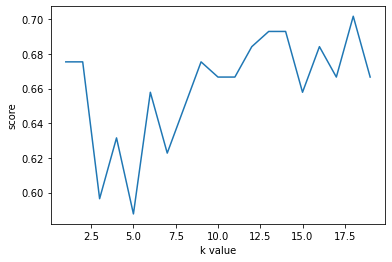

In [482]:
score_list=[]
for i in range(1,20):
    knn2=KNeighborsClassifier(n_neighbors=i)
    knn2.fit(x_train,y_train)
    score_list.append(knn2.score(x_test,y_test))
    
plt.plot(range(1,20),score_list)
plt.xlabel("k value")
plt.ylabel("score")
plt.show()

In [483]:
from sklearn.svm import SVC
svm=SVC(random_state=1)
svm.fit(x_train,y_train)

print("svm score:",svm.score(x_test,y_test))

svm score: 0.7105263157894737


In [484]:
 from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=1)
dt.fit(x_train,y_train)

print("dt score:",dt.score(x_test,y_test))

dt score: 0.5877192982456141


In [487]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=200, random_state=1)
rf.fit(x_train,y_train)

print("rf score:",rf.score(x_test,y_test))

rf score: 0.6578947368421053


In [486]:
print("knnscore:",knn.score(x_test,y_test))
print("svm score:",svm.score(x_test,y_test))
print("dt score:",dt.score(x_test,y_test))
print("rf score:",rf.score(x_test,y_test))

knnscore: 0.7017543859649122
svm score: 0.7105263157894737
dt score: 0.5877192982456141
rf score: 0.6578947368421053


In [488]:
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=1)

dt=DecisionTreeClassifier(random_state=1)
dt.fit(x_train,y_train)
dt_pred=dt.predict(x_test)

rf=RandomForestClassifier(n_estimators=200,random_state=1)
rf.fit(x_train,y_train)
rf_pred=rf.predict(x_test)

In [489]:
print("dt","r2",r2_score(y_test,dt_pred),"mae:",mean_absolute_error(y_test,dt_pred))
print("rf","r2",r2_score(y_test,rf_pred),"mae:",mean_absolute_error(y_test,rf_pred))

dt r2 -0.7190476190476187 mae: 0.3333333333333333
rf r2 -0.2666666666666664 mae: 0.24561403508771928


In [490]:
from sklearn.metrics import roc_auc_score, classification_report, accuracy_score
import sklearn.metrics as metrics

In [491]:
knn = KNeighborsClassifier(n_neighbors = 18)
knn.fit(x_train,y_train)
knn_pred = knn.predict(x_test)

In [492]:
score = knn.score(x_test, y_test)
test_roc_auc = roc_auc_score(y_test, knn_pred)
print("KNN Score - ",score)
print("Performance of this model - ")
print(metrics.classification_report(y_test, knn_pred, digits=3))
print("Accuracy score: ", metrics.accuracy_score(y_test,knn_pred))
print('ROC AUC score: {:.3f}'.format(test_roc_auc))

KNN Score -  0.7719298245614035
Performance of this model - 
              precision    recall  f1-score   support

           1      0.784     0.952     0.860        42
           2      0.667     0.267     0.381        15

    accuracy                          0.772        57
   macro avg      0.725     0.610     0.621        57
weighted avg      0.753     0.772     0.734        57

Accuracy score:  0.7719298245614035
ROC AUC score: 0.610


In [493]:
svm = SVC(random_state=1)
svm.fit(x_train,y_train)
svm_pred= svm.predict(x_test)

In [494]:
score = svm.score(x_test, y_test)
print("SVM Score: ",score)
print("Performance of this model - ")
print(metrics.classification_report(y_test, svm_pred, digits=3))
print("Accuracy score: ", metrics.accuracy_score(y_test,svm_pred))
test_roc_auc = roc_auc_score(y_test, svm_pred)
print('ROC AUC score: {:.3f}'.format(test_roc_auc))

SVM Score:  0.7368421052631579
Performance of this model - 
              precision    recall  f1-score   support

           1      0.737     1.000     0.848        42
           2      0.000     0.000     0.000        15

    accuracy                          0.737        57
   macro avg      0.368     0.500     0.424        57
weighted avg      0.543     0.737     0.625        57

Accuracy score:  0.7368421052631579
ROC AUC score: 0.500


C:\Users\hsncm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [495]:
dt=DecisionTreeClassifier(random_state=1)
dt.fit(x_train,y_train)
dt_pred=dt.predict(x_test)

In [496]:
score = dt.score(x_test, y_test)
print("DT Score: ",score)
print("Performance of this model - ")
print(metrics.classification_report(y_test, dt_pred, digits=3))
print("Accuracy score: ", metrics.accuracy_score(y_test,dt_pred))
test_roc_auc = roc_auc_score(y_test, dt_pred)
print('ROC AUC score: {:.3f}'.format(test_roc_auc))

DT Score:  0.6666666666666666
Performance of this model - 
              precision    recall  f1-score   support

           1      0.829     0.690     0.753        42
           2      0.409     0.600     0.486        15

    accuracy                          0.667        57
   macro avg      0.619     0.645     0.620        57
weighted avg      0.718     0.667     0.683        57

Accuracy score:  0.6666666666666666
ROC AUC score: 0.645


In [497]:
rf=RandomForestClassifier(n_estimators=200,random_state=1)
rf.fit(x_train,y_train)
rf_pred=rf.predict(x_test)

In [498]:
score = rf.score(x_test, y_test)
print("RF Score:  ",score)
print("Performance of this model - ")
print(metrics.classification_report(y_test, rf_pred, digits=3))
print("Accuracy score:", metrics.accuracy_score(y_test,rf_pred))
test_roc_auc = roc_auc_score(y_test, rf_pred)
print('ROC AUC score: {:.3f}'.format(test_roc_auc))

RF Score:   0.7543859649122807
Performance of this model - 
              precision    recall  f1-score   support

           1      0.780     0.929     0.848        42
           2      0.571     0.267     0.364        15

    accuracy                          0.754        57
   macro avg      0.676     0.598     0.606        57
weighted avg      0.725     0.754     0.720        57

Accuracy score: 0.7543859649122807
ROC AUC score: 0.598
